In [1]:
import pandas as pd
data=pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

In [2]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data_num=data.select_dtypes(include=['int64','float64'])
data_num.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data_num=data_num.drop(columns=['RowNumber','CustomerId'],axis=1)
data_num.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.0,1,1,1,101348.88,1


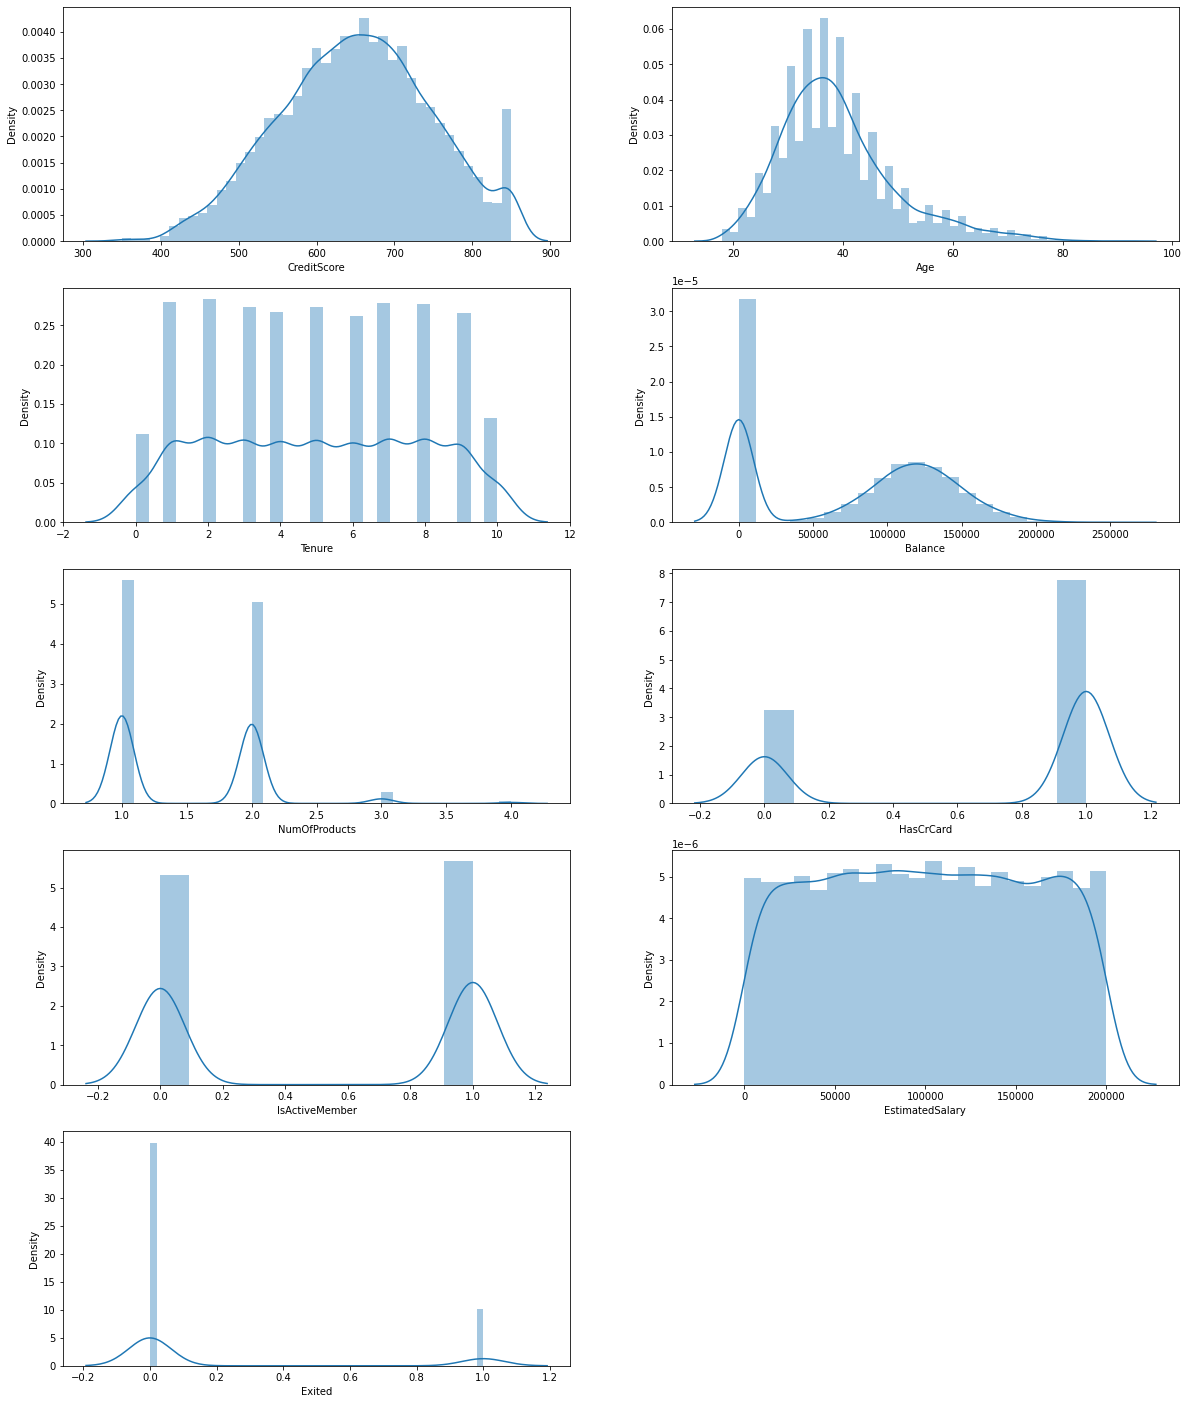

In [9]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25))
for i, var in enumerate(data_num.columns):
    plt.subplot(5,2,i+1)
    sns.distplot(data_num[var])

In [10]:
data_num.tail(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,792,28,4,130142.79,1,1,0,38190.78,0


In [11]:
data_num['Total_balance']=data_num['Balance']+data_num['EstimatedSalary']

In [12]:
data_num=data_num.drop(columns=['Balance','EstimatedSalary'],axis=1)
data_num.head(1)

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Total_balance
0,619,42,2,1,1,1,1,101348.88


In [13]:
data_cat=data.select_dtypes(include=['object'])
data_cat.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [14]:
data_cat=data_cat.drop(columns='Surname',axis=1)
data_cat.tail(1)

,Geography,Gender
9999,France,Female


In [15]:
data_cat=pd.get_dummies(data_cat,drop_first=True)
data_cat.head(1)

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0


In [16]:
df=pd.merge(data_num,data_cat,left_index=True,right_index=True)
df.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Total_balance,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,1,1,1,1,101348.88,0,0,0
1,608,41,1,1,0,1,0,196350.44,0,1,0
2,502,42,8,3,1,0,1,273592.37,0,0,0
3,699,39,1,2,0,0,0,93826.63,0,0,0
4,850,43,2,1,1,1,0,204594.92,0,1,0


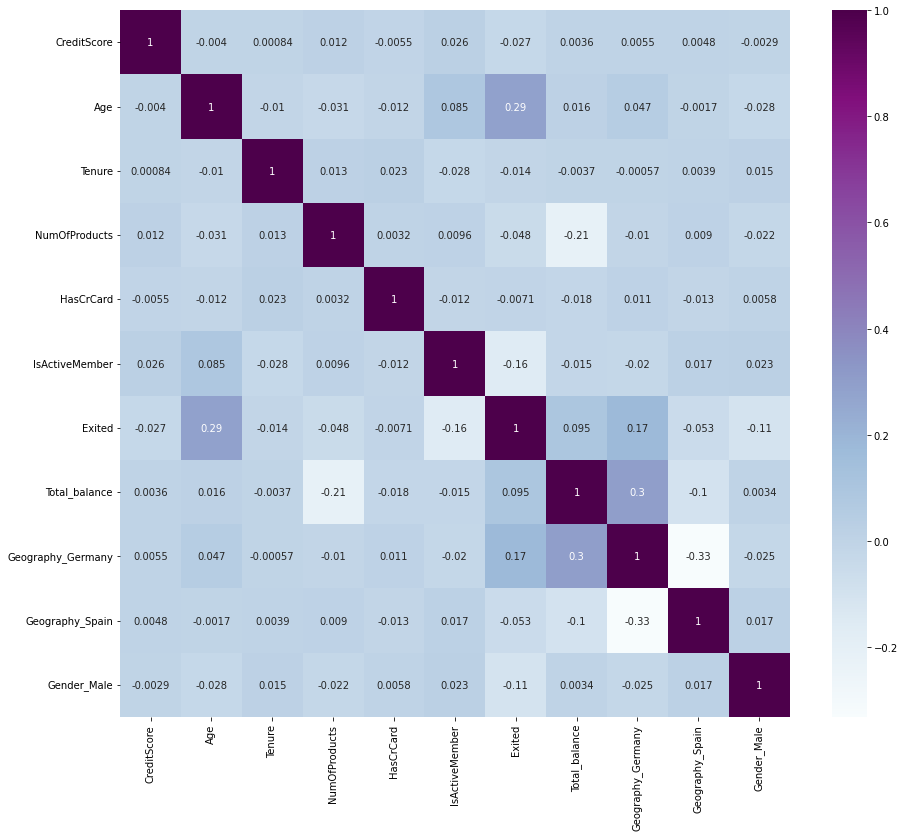

In [17]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.show()

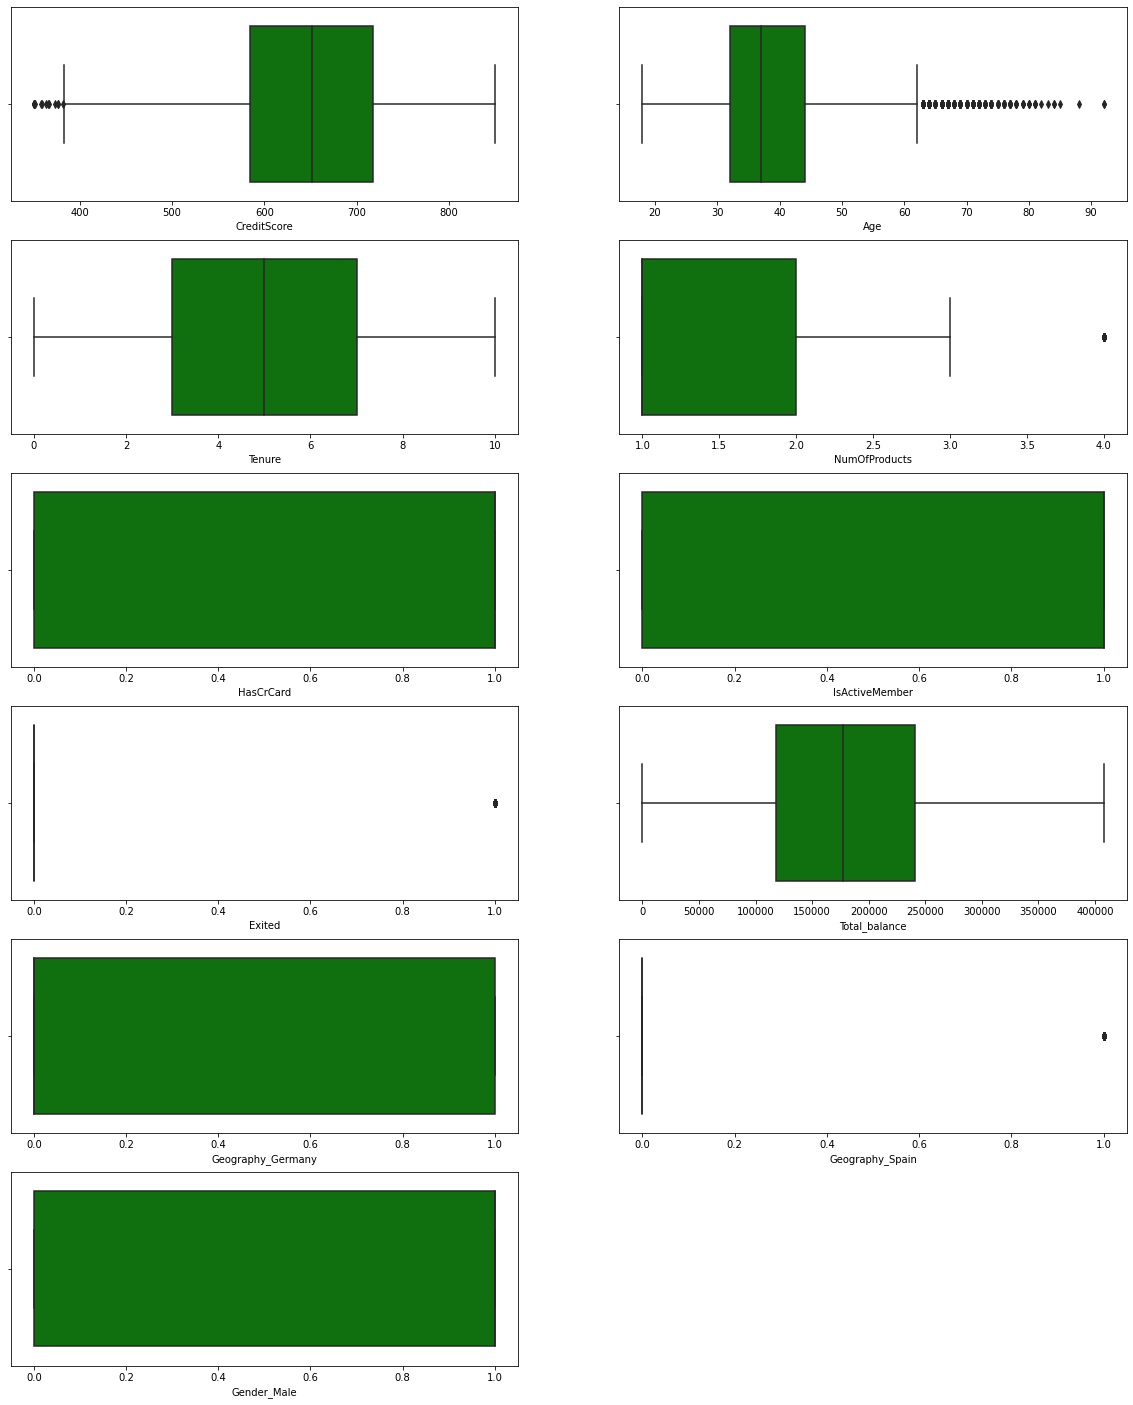

In [18]:
plt.figure(figsize=(20,25))
for i,var in enumerate(df.columns):
    plt.subplot(6,2,i+1)
    sns.boxplot(df[var],color='green')

In [19]:
x=df.drop(columns='Exited')
y=df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [21]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
y_pred=xgb.predict(x_test)

In [23]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [25]:
accuracy_score(y_test,y_pred)

0.845

In [26]:
cm=confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[1499,   83],
       [ 227,  191]])

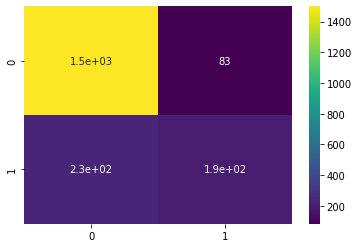

In [28]:
sns.heatmap(cm,cmap='viridis',annot=True)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfg=RandomForestClassifier(n_estimators=200)
rfg.fit(x_train,y_train)
y_pred2=rfg.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8525

#Applying Neural Network

In [30]:
from tensorflow.keras import layers,models

In [31]:
nn=models.Sequential([
    
    layers.Dense(101,activation='relu',input_shape=(10,)),
    layers.Dense(29,activation='relu'),
    layers.Dense(1,activation='sigmoid')
    
    
])

2022-07-01 10:02:30.816802: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
x_train=rb.fit_transform(x_train)
x_test=rb.transform(x_test)

In [33]:
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
nn.fit(x_train,y_train,epochs=50)

2022-07-01 10:02:31.136032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.4601 - accuracy: 0.8099
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8356
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8545
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3482 - accuracy: 0.8610
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.8614
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8661
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8631
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8660
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8670
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8670

In [34]:
y_pred3=nn.predict(x_test)
y_pred3[:6]

array([[0.8543925 ],
       [0.0297395 ],
       [0.9492817 ],
       [0.48191023],
       [0.7613361 ],
       [0.14347804]], dtype=float32)

In [35]:
y_pred3=(y_pred3>0.5)
y_pred3[:4]

array([[ True],
       [False],
       [ True],
       [False]])

In [36]:
y_pred3=y_pred3.reshape(-1,)
y_pred3[:5]

array([ True, False,  True, False,  True])

In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [38]:
y_pred3=pd.DataFrame(y_pred3)
y_pred3=y_pred3.rename(columns={0:'Exited'})
y_pred3

,Exited
0,True
1,False
2,True
3,False
4,True
...,...
1995,False
1996,False
1997,False
1998,True


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_pred3=le.fit_transform(y_pred3)
y_pred3

array([1, 0, 1, ..., 0, 1, 1])

In [40]:
accuracy_score(y_test,y_pred3)

0.8485